In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
# 1. Load and Inspect Data
# ----------------------
print("=== 1. Loading and inspecting data ===")

# Load CSV with semicolon separator
df = pd.read_csv("sample type claim.csv", header=None, sep=";")

# Rename columns
df.columns = ['ClaimID', 'Total_Amount', 'Paid_Amount', 'Claim_Type']

# Display sample data
print("First few rows:")
print(df.head())

# Check data info
print("\nData info:")
print(df.info())

# Check unique claim types
print("\nUnique Claim Types:", df['Claim_Type'].unique())

=== 1. Loading and inspecting data ===
First few rows:
  ClaimID      Total_Amount          Paid_Amount         Claim_Type
0      ID  Cost_claims_year  Cost_claims_by_type        Claims_type
1      28            332.02               332.02          complaint
2      36             57.35                57.35  travel assistance
3      42              57.5                 57.5  travel assistance
4      60             138.9                67.25  travel assistance

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7367 entries, 0 to 7366
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ClaimID       7367 non-null   object
 1   Total_Amount  7367 non-null   object
 2   Paid_Amount   7367 non-null   object
 3   Claim_Type    7367 non-null   object
dtypes: object(4)
memory usage: 230.3+ KB
None

Unique Claim Types: ['Claims_type' 'complaint' 'travel assistance' 'broken windows'
 'negligence' 'all risks' 'theft' '

In [15]:
# 2. Feature Engineering & Preprocessing
# ----------------------
print("\n=== 2. Preprocessing data ===")

# Drop ClaimID
df = df.drop(columns=['ClaimID'])

# Convert numeric columns to float
df['Total_Amount'] = pd.to_numeric(df['Total_Amount'], errors='coerce')
df['Paid_Amount'] = pd.to_numeric(df['Paid_Amount'], errors='coerce')

# Drop missing values
df = df.dropna()

# Encode target variable
le = LabelEncoder()
df['Claim_Type_Encoded'] = le.fit_transform(df['Claim_Type'])

# Define X and y
X = df[['Total_Amount', 'Paid_Amount']]
y = df['Claim_Type_Encoded']


=== 2. Preprocessing data ===


In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# 3. Model Building
# ----------------------
print("\n=== 3. Training models ===")

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}




=== 3. Training models ===


In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(name, y_true, y_pred, le):
    acc = accuracy_score(y_true, y_pred)
    print(f"\n--- {name} Results ---")
    print(f"Accuracy: {acc:.4f}")

    # Get unique labels in y_true and y_pred
    labels = np.unique(np.concatenate((y_true, y_pred)))

    # Generate classification report with only existing labels
    print(classification_report(y_true, y_pred, labels=labels, target_names=le.classes_[labels], zero_division=0))

    # Confusion matrix with proper labels
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_[labels],
                yticklabels=le.classes_[labels])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return acc


--- Logistic Regression Results ---
Accuracy: 0.6608
                   precision    recall  f1-score   support

        all risks       0.00      0.00      0.00        75
   broken windows       0.00      0.00      0.00       146
        complaint       0.43      0.45      0.44       264
         injuries       0.00      0.00      0.00         7
       negligence       0.52      0.30      0.38       135
            other       0.00      0.00      0.00         6
            theft       0.00      0.00      0.00         9
travel assistance       0.73      0.98      0.84       832

         accuracy                           0.66      1474
        macro avg       0.21      0.22      0.21      1474
     weighted avg       0.54      0.66      0.58      1474



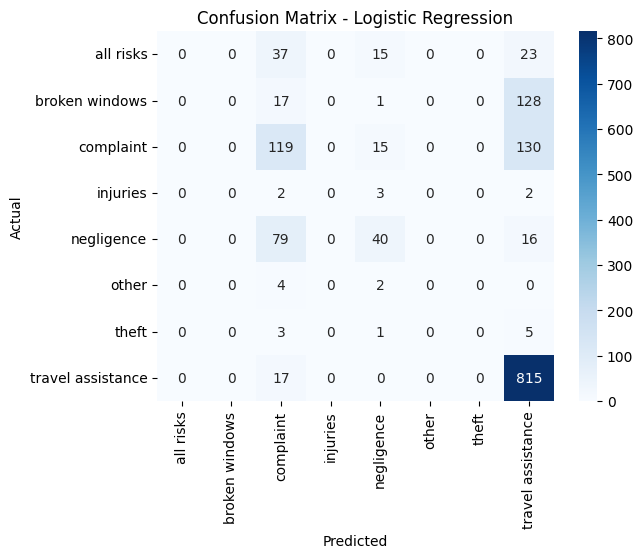


--- Decision Tree Results ---
Accuracy: 0.6554
                   precision    recall  f1-score   support

        all risks       0.12      0.15      0.13        75
   broken windows       0.36      0.35      0.36       146
        complaint       0.47      0.44      0.45       264
             fire       0.00      0.00      0.00         0
         injuries       0.14      0.14      0.14         7
       negligence       0.59      0.64      0.61       135
            other       0.00      0.00      0.00         6
            theft       0.00      0.00      0.00         9
travel assistance       0.85      0.84      0.84       832

         accuracy                           0.66      1474
        macro avg       0.28      0.28      0.28      1474
     weighted avg       0.66      0.66      0.66      1474



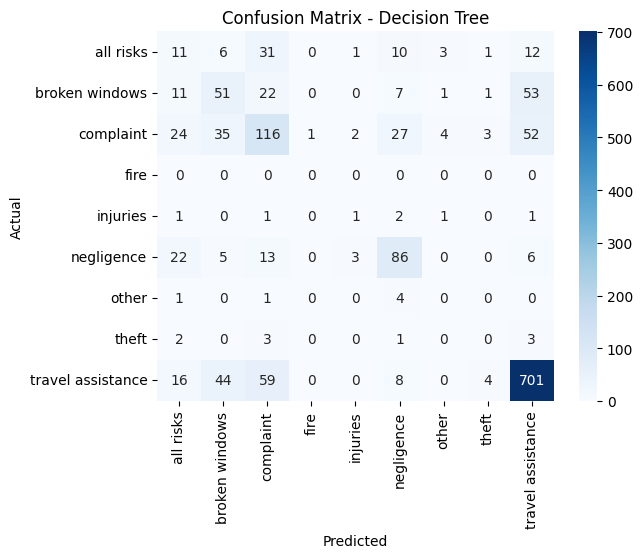


--- Random Forest Results ---
Accuracy: 0.6710
                   precision    recall  f1-score   support

        all risks       0.18      0.17      0.18        75
   broken windows       0.33      0.32      0.32       146
        complaint       0.50      0.41      0.45       264
         injuries       0.25      0.14      0.18         7
       negligence       0.58      0.70      0.63       135
            other       0.00      0.00      0.00         6
            theft       0.00      0.00      0.00         9
travel assistance       0.83      0.87      0.85       832

         accuracy                           0.67      1474
        macro avg       0.33      0.33      0.33      1474
     weighted avg       0.66      0.67      0.66      1474



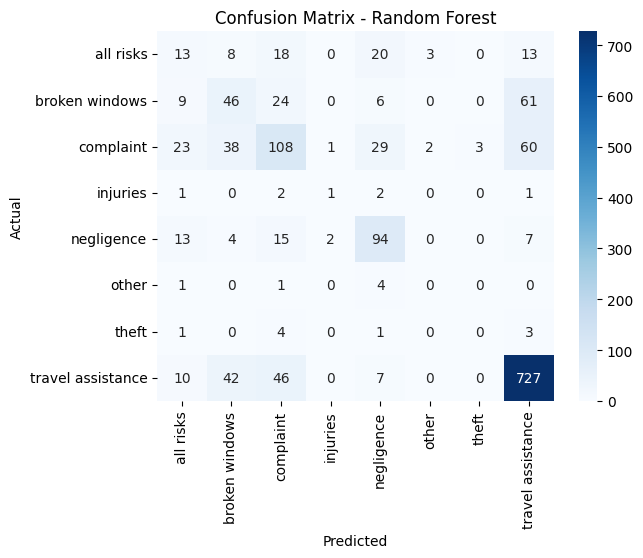

In [21]:
from sklearn.preprocessing import LabelEncoder

# Example usage inside loop
le = LabelEncoder()
y_encoded = le.fit_transform(df['Claim_Type'])

...

for name, model in models.items():
    if name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    results[name] = evaluate_model(name, y_test, y_pred, le)

In [24]:
from sklearn.metrics import classification_report
import numpy as np

# Get unique labels present in either y_test or y_pred_best
labels_present = np.unique(np.concatenate((y_test, y_pred_best)))

# Generate classification report using only those labels
print(classification_report(
    y_test,
    y_pred_best,
    labels=labels_present,
    target_names=le.classes_[labels_present],
    zero_division=0  # Optional: handles cases where a class has no true positives
))

                   precision    recall  f1-score   support

        all risks       0.00      0.00      0.00        75
   broken windows       0.43      0.36      0.39       146
        complaint       0.61      0.45      0.52       264
         injuries       0.00      0.00      0.00         7
       negligence       0.52      0.84      0.64       135
            other       0.00      0.00      0.00         6
            theft       0.00      0.00      0.00         9
travel assistance       0.83      0.93      0.88       832

         accuracy                           0.72      1474
        macro avg       0.30      0.32      0.30      1474
     weighted avg       0.67      0.72      0.69      1474




=== 5. Model Comparison ===
                   Model  Accuracy
0    Logistic Regression  0.660787
1          Decision Tree  0.655360
2          Random Forest  0.670963
3  Random Forest (Tuned)  0.719810


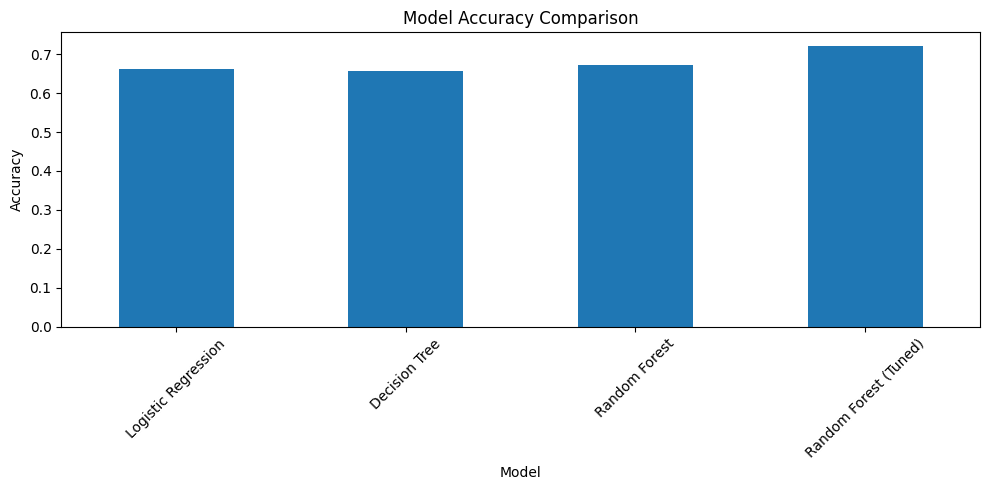

In [23]:
# 5. Compare All Models
# ----------------------
print("\n=== 5. Model Comparison ===")
comparison_df = pd.DataFrame(results.items(), columns=['Model', 'Accuracy'])
comparison_df.loc[len(comparison_df)] = ['Random Forest (Tuned)', accuracy_score(y_test, y_pred_best)]
print(comparison_df)

# Plot comparison
comparison_df.set_index('Model')['Accuracy'].plot(kind='bar', figsize=(10, 5))
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()